# Exercise 1: Modeling Palmer Penguins





In this exercise, we return to the Palmer Penguin data set.

In [3]:
import seaborn as sns
penguins = sns.load_dataset("penguins")

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## a: Fit a Simple Linear Regression

Fit a simple linear regression between `body_mass_g` (y) and `flipper_length_mm` (x)  and look at the model summary:


In [4]:
## code here
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from IPython.display import display, Markdown


In [5]:
penguins.isnull().value_counts()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex  
False    False   False           False          False              False        False    333
                                                                                True       9
                 True            True           True               True         True       2
Name: count, dtype: int64

In [6]:
## Data prepocessing: Replace NaNs with median of columns

penguins = penguins.fillna({'flipper_length_mm': penguins['flipper_length_mm'].median(), \
                           'body_mass_g': penguins['body_mass_g'].median()})

penguins.isnull().value_counts()

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex  
False    False   False           False          False              False        False    333
                                                                                True       9
                 True            True           False              False        True       2
Name: count, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(penguins[["flipper_length_mm"]], penguins[["body_mass_g"]], random_state = 430)

print(f"Number of samples in testing: {X_test.shape[0]} (~"
      f"{X_test.shape[0] / penguins.shape[0] * 100:.1f}%) of the"
      f" original set")
print(f"Number of samples in training: {X_train.shape[0]} (~"
      f"{X_train.shape[0] / penguins.shape[0] * 100:.1f}%) of the"
      f" original set")

# Create a linear regression model object
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

# Retrieve parameters (p >= 1)
hat_beta_1_reg = model.coef_

# Retrieve the intercept term (p = 0)
hat_beta_0_reg = model.intercept_

# Display guesses in a nicely formatted manner
display(Markdown(rf"""

Estimated values for """r"""$\boldsymbol{\beta}$"""

rf"""
- $\hat\beta_0$ = {hat_beta_0_reg[0]:.04f}
- $\hat\beta_1$ = {hat_beta_1_reg[0][0]:.04f}
"""
))

Number of samples in testing: 86 (~25.0%) of the original set
Number of samples in training: 258 (~75.0%) of the original set




Estimated values for $\boldsymbol{\beta}$
- $\hat\beta_0$ = -5951.9974
- $\hat\beta_1$ = 50.4952


What is the equation of the fitted model?

---

$$\bar{Y} = -5951.9974 + 50.4952 \bar{X}$$

---

## b: Interpret Model Parameters

Interpret the slope and the intercept. That is, for every 1-unit change in `flipper_length_mm` what happens?



---

**At zero flipper length, the penguins are predicted to have about ~ -5952 body mass (intercept) in grams, while for every one unit change in the flipper length of penguins, the body mass increases by about ~50.1 grams (slope).**

---

Are the coefficients significant?

---

**Yes, the coefficients are significant. The intercept indicate a value that poiints towards variability in the data and the slope indicates that there is an overall positive relationship between flipper length and body mass of penguins.**

---

## c: Creating Predictions

If we had two additional penguins added to the data set with Flipper Length equivalent to 175 and 200 mm respectively, what would their body mass be?

In [8]:
## Code here
X_test_new = pd.DataFrame({"flipper_length_mm": [175, 200]})

# Obtain predictions only on the test data
Y_hat_test = model.predict(X_test_new)

print(Y_hat_test)

display(Markdown(rf"""

Estimated penguin body mass value for """

rf"""
- Flipper Length = 175 mm is {Y_hat_test[0, 0]:.04f} and
- Flipper Length = 200 mm is {Y_hat_test[1, 0]:.04f}
"""
))

[[2884.66957345]
 [4147.05056994]]




Estimated penguin body mass value for 
- Flipper Length = 175 mm is 2884.6696 and
- Flipper Length = 200 mm is 4147.0506


## d: Residuals

Confirm that the mean of residuals generated by the model is zero.

In [9]:
## Code here
y_pred = model.predict(X_train)

residuals = y_train - y_pred

# Mean of residuals
resid_mean = np.mean(residuals)

print(f"Residual mean = {resid_mean:.4f}")

Residual mean = -0.0000


## e: Your favorite Model

Please try fitting a slightly more complex model that includes at least 2 or more independent variables ($x_1$, $x_2$, ... ).

In [10]:
###
penguins = penguins.fillna({'bill_length_mm': penguins['bill_length_mm'].median(), \
                           'bill_depth_mm': penguins['bill_depth_mm'].median()})

X_train, X_test, y_train, y_test = train_test_split(penguins[["flipper_length_mm", "sex", "species"]], \
                                                    penguins[["body_mass_g"]], random_state = 430)

print(f"Number of samples in testing: {X_test.shape[0]} (~"
      f"{X_test.shape[0] / penguins.shape[0] * 100:.1f}%) of the"
      f" original set")
print(f"Number of samples in training: {X_train.shape[0]} (~"
      f"{X_train.shape[0] / penguins.shape[0] * 100:.1f}%) of the"
      f" original set")

X_train_ind = pd.get_dummies(X_train)

# Create a linear regression model object
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train_ind, y_train)

# Retrieve parameters (p >= 1)
hat_beta_1_reg = model.coef_
hat_beta_1_reg = np.array(hat_beta_1_reg).flatten()

# Retrieve the intercept term (p = 0)
hat_beta_0_reg = model.intercept_

# Display guesses in a nicely formatted manner
display(Markdown(rf"""

Estimated values for """r"""$\boldsymbol{\beta}$"""

rf"""
- $\hat\beta_0$ = {hat_beta_0_reg[0]:.04f}
- $\hat\beta_1, \hat\beta_2, \hat\beta_3$ = {hat_beta_1_reg[0]:.04f}, {hat_beta_1_reg[1]:.04f}, {hat_beta_1_reg[2]:.04f}
"""
))

Number of samples in testing: 86 (~25.0%) of the original set
Number of samples in training: 258 (~75.0%) of the original set




Estimated values for $\boldsymbol{\beta}$
- $\hat\beta_0$ = -270.9548
- $\hat\beta_1, \hat\beta_2, \hat\beta_3$ = 20.0890, 154.1769, 681.5118


How does youre model perform?

----

**The model seems to perform better with more predictors that account for some variability in the data. That is, the intercept is largely reduced compared to when we had one predictor.**

---

# Exercise 2: Diving into Residuals

Consider the `surreal_residual` data set found here:

<https://raw.githubusercontent.com/coatless/raw-data/main/surreal-residuals.csv>

The data set contains 7 variables. The first variable is the response and the remaining variables in columns 2 - 7 contain the predictors.



## a: Data import

Please import the data into Python using pandas.

In [ ]:
## code here

## b: Pair-wise plot

Construct a pair-wise graph using seaborn's [`sns.pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html). Comment if any values look abnormal.

In [ ]:
## code here

## c: Fit Multiple Linear Regression

Fit a model using the variable in the first column as the response and columns 2 - 7 as the response. Please ensure that the model contains an intercept

In [ ]:
## code here

## d: Model Overview

Please show the estimated parameters of the model using the model summary feature of `statsmodels`.

In [ ]:
## code here

Looking at the model overview, does there appear to be any issues?

---

answer

---

## e: Compute and Visualize

Please compute the predicted values and the resulting residuals.



In [ ]:
## code here

## f: Visualizing Residuals

Create a graph of the predicted values ($x$-axis) against the residuals ($y$-axis).


In [ ]:
## code here

What do you notice about the residual pattern? What does this indicate about the benefits of using a residual plot?

---

answer

---

# Exercise 3: [i am numpy](https://www.youtube.com/watch?v=RMdIx228dBw)

In this exercise, we emphasize different components of the NumPy library.



### a: NumPy Calculations

Consider the following matrix $\mathbf{A}$ and column vector $\mathbf{x}$:

$$
\mathbf{A} = \begin{bmatrix}
-1 & 3 & 5 \\
 4 & 9 & 7 \\
 8 & 3 & 1 \\
\end{bmatrix}_{3 \times 3},\quad \mathbf{x} = \begin{bmatrix}
3 \\
1 \\
2
\end{bmatrix}_{3 \times 1}
$$

Compute the following:

1. $\mathbf{A}\mathbf{x}$
2. $\mathbf{A}^\top$
3. $\mathbf{x}^\top\mathbf{A}\mathbf{x}$




In [ ]:
# Code here

### b: Random Number Generation

Using NumPy, create a function that generates two random $n \times p$ arrays from a normal distribution.

Implementation Guidelines:

- **Arguments:**
    - `n`: Number of Rows
    - `p`: Number of Columns
- **Return:**
    - Two NumPy arrays of dimensions $n \times p$.

**Note:** _Python_ allows a function to return multiple values by having them prefixed by a comma `,` in the `return` statement. For example, using `return x1, x2` would return both `x1` and `x2`. These values may be unpacked and assigned individually on the same line as a function call:

```
output_x_1, output_x_2 = my_function()
```

In [ ]:
# Code here

### c: Hadamard Product Vectorized vs. Looped

Next, let's create two different functions that compute the **Hadamard (element-wise) product** between matrices in two different ways:

1. Implement the element-wise matrix multiplication using two `for` loops
   to visit _each_ element in the matrix.
2. Use NumPy's built-in `*` functionality.

Recall, the **hadamard (element-wise) product** requires two matrices $\mathbf{A}, \mathbf{B} \in \mathbb{R}^{n \times m}$ such that:

$$\begin{align}
(\mathbf{A} \circ \mathbf{B})_{ij} &= (\mathbf{A} \odot \mathbf{B})_{ij} \\
&= (\mathbf{A})_{ij} (\mathbf{B})_{ij} \\
&=\begin{bmatrix}
 a_{11}b_{11} & a_{12}b_{12} & \cdots & a_{1m}b_{1m} \\
 a_{21}b_{21} & a_{22}b_{22} & \cdots & a_{2m}b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1}b_{n1} & a_{n2}b_{n1} & \cdots & a_{nm}b_{nm} \\
\end{bmatrix}_{n \times m}
\end{align}$$

Implementation Guidelines for each function:

- **Arguments:**
  - `A`: Array of dimension $n \times p$
  - `B`: Array of dimension $n \times p$
- **Return:**
  - Hadamard product of $A \circ B$.




In [ ]:
# Code here

### d: Benchmarking

Run each function **100 times** while timing how long each function takes to execute. Store the run time of each run into a numpy array.

The following code snippet should help with setting up timing.

```python
import time

# Setup any data required for the functions here:
A = ...
B = ...

# Start timining
start_time = time.time()

# Place desired function to time here

# Finish timing
end_time = time.time()

# Calculate final time
run_time = end_time - start_time
```

Compute the mean and standard deviation of how long each function took to run.



In [ ]:
# Code here

What are the notable differences between the two functions? If you had perform this operation millions of times, which function should be chosen?

... answer here ...

# Exercise 4: Descending Gradients

The objective of this exercise is to expand simple linear regression to estimating multiple linear regression with parameters estimated by gradient descent.




### a: Data Generating Function Creation

Design and implement a function that randomly generates a set of data and observed values for linear regression given dimensions and parameter values. Make sure to add "noise" to the predictions to avoid having a perfectly linear relationship and ensure that the first column of the design matrix contains only the value **1** so that the model has an intercept term.

$$\boldsymbol{Y} = \boldsymbol{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}$$

Implementation Guidelines:

- **Arguments:**
    - `n`: Number of Observations
    - `theta`: A vector of true parameter values up to `p`.
    - `noise`: A single value that adds distortion.
    - `seed`: Value to generate the data under.
- **Return:**
    - `X` the design matrix of dimensions `n x p`, with the first column a series of 1s.
    - `y` the values observed with added noise.

_Hints:_

- NumPy has a built in way of generating random data with [`np.random.randn(n, p)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)
- Moreover, to add a column, consider using [`np.append(new_col, data, 1)`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html).


**Note:** _Python_ allows a function to return multiple values by having them prefixed by a comma `,` in the `return` statement. E.g. `return x1, x2` would return both `x1` and `x2`. These values may be unpacked and assigned individually on the same line as a function call:

```
output_x_1, output_x_2 = my_function()
```

In [13]:
# Code here

def generate_data(n, theta, noise, seed):
    
    np.random.seed(seed)
    
    p = len(theta)
    X = np.random.randn(n, p-1)
    X = np.insert(X, 0, 1, axis = 1)
    error = np.random.normal(loc = 0, scale = noise, size = n) 
    y = X.dot(theta) + error
    
    return X, y

In [14]:
# Verification of solutions
n = 100
noise = 1
seed = 1312
theta = [1, 2]

X, y = generate_data(n, theta, noise, seed)

### b: Prediction Computation

Create a function that computes predictions under multiple linear regression.

$$\hat Y = X \hat\beta$$

Implementation Guidelines:

- **Arguments:**
    - `X`: A design matrix of dimension `n x p`
    - `theta`: A vector holding the parameters `p`.
- **Return:**
    - A vector of prediction length `n`.



In [15]:
# Code here

def multiple_linearReg(X, theta):
          
    y_hat = X.dot(theta)
    
    return y_hat

### c: MSE Cost

Implement the mean squared error cost function for multiple linear regression in Python.

$$MSE(y_i, \hat y_i) = \frac{1}{n}\sum_{i=1}^{n} \left({y_i - \hat y_i}\right)^2$$

Implementation Guidelines:

- **Arguments:**
    - `X`: A design matrix of dimension `n x p`
    - `y`: Vector containing the actual values `n`.
    - `theta`: A vector of parameter estimates `p`.
- **Return:**
    - Single value of cost.

In [16]:
# Code here

from sklearn.metrics import mean_squared_error

def MSE_calculator(X, y, theta):
    
    y_hat = X.dot(theta)
    
    model_error = mean_squared_error(y, y_hat)
    
    return model_error

In [17]:
# print(f"The root mean squared error of the optimal model is {model_error:.2f}")

### d: Gradient Descent for MLR

Build a function that performs gradient descent for multiple linear regression across all parameters.

That is, compute:

$$\theta_j := \theta_j - \alpha \frac{\partial }{\partial \theta_j} J(\theta_0, \theta_1, \cdots, \theta_p)$$

where:

$$\begin{align}
\frac{\partial }{\partial \theta_j} J(\theta_0, \theta_1, \cdots, \theta_p) &= \frac{2}{n} \sum_{i=1}^n \left[\left({ y_i - \hat y_i }\right) \left(-x_{ij}\right)\right] \\
&= \frac{2}{n} \sum_{i=1}^n \left[\left({  \hat y_i - y_i  }\right)x_{ij}\right] \\
&= \frac{2}{n} \sum_{i=1}^n \left[\left({ \left[ \sum_{j=1}^{p}   x_{ij} \hat\theta_j \right] - y_i  }\right)x_{ij}\right] \\
\end{align}$$

Make sure to store the value of the cost function at each epoch.

Implementation Guidelines:

- **Arguments:**
    - `X`: A design matrix of dimension `n x p`
    - `y`: Vector containing the actual values `n`.
    - `theta`: A vector of parameter estimates `p`.
    - `alpha`: The learning rate for the problem.
     - Default: `0.002`
    -  `epochs`: Number of times to run gradient descent
- **Return:**
    - `theta_hat`: The estimated values for the parameters.
    - `cost`: Final cost value.
    - `cost_history`: An array containing the cost at each epoch.

In [18]:
# Code here

def MLR_GD_calculator(X, y, theta, epochs, alpha = 0.002):
    
    n = float(len(X))
    
    cost_history = np.zeros(epochs)
    
    for i in range(epochs):
        
        y_hat = X.dot(theta)
        
        D_theta = (-2 / n) * X.T.dot(y - y_hat)

        # Consecutive update
        theta_hat = theta - alpha * D_theta       # Update theta_hat
        theta = theta_hat                         # Update theta_hat

        # Compute cost under the updated parameters
        cost = sum((y - y_hat) ** 2) / n          # Compute cost
        
        cost_history[i] = cost                    # Save into history
        
    return theta_hat, cost, cost_history

### e: Application of Functions


With the functions in hand, attempt to perform two estimations under conditions:

_Scenario 1_:

$$
\begin{align}
\theta_0 &= -3.1, \theta_1 = 1.5\\
n &= 1000, \text{epoch} = 9000 \\
\end{align}
$$

_Scenario 2_:

$$
\begin{align}
\theta_0 &= 2, \theta_1 = -1, \theta_2 = 3.3 \\
n &= 500, \text{epoch} = 6000 \\
\end{align}
$$

**Note:** Feel free to see what happens when $\alpha$ is set to be higher or lower than the default.

**For reproducibility, set a seed using your favorite 4 digit number.**

As the data is generated using NumPy, please use [`np.random.seed(seed_value)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html) to set the seed.



In [19]:
# Simulation Code
# Code here
n = 1000
theta = [-3.1, 1.5]
noise = 1
seed = 1219
epochs = 9000

# Scenario 1
X, y = generate_data(n, theta, noise, seed)
y_hat = multiple_linearReg(X, theta)
theta_hat, cost, cost_history = MLR_GD_calculator(X, y, theta, epochs)
flat_theta_hat = ", ".join([f"{t:.4f}" for t in theta_hat])

print("X_shape:", np.shape(X))
print("y_shape:", np.shape(y))
print("y_hat_shape:", np.shape(y_hat))
print(f"The predicted parameters are: {flat_theta_hat}")
print(f"The final cost is: {cost:.4f}")
print("The cost history is:", cost_history)

X_shape: (1000, 2)
y_shape: (1000,)
y_hat_shape: (1000,)
The predicted parameters are: -3.0688, 1.5062
The final cost is: 1.0123
The cost history is: [1.01329395 1.01328579 1.01327769 ... 1.0122766  1.0122766  1.0122766 ]


In [20]:
# Simulation Code
n = 500
theta = [2, -1, 3.3]
noise = 1
seed = 1219
epochs = 6000

# Scenario 2
X, y = generate_data(n, theta, noise, seed)
y_hat = multiple_linearReg(X, theta)
model_error = MSE_calculator(X, y, theta)
theta_hat, cost, cost_history = MLR_GD_calculator(X, y, theta, epochs)
flat_theta_hat = ", ".join([f"{t:.4f}" for t in theta_hat])

print("X_shape:", np.shape(X))
print("y_shape:", np.shape(y))
print("y_hat_shape:", np.shape(y_hat))
print(f"The predicted parameters are: {flat_theta_hat}")
print(f"The final cost is: {cost:.4f}")
print("The cost history is:", cost_history)


X_shape: (500, 3)
y_shape: (500,)
y_hat_shape: (500,)
The predicted parameters are: 2.0077, -1.0068, 3.3365
The final cost is: 0.9702
The cost history is: [0.97164978 0.97163786 0.97162603 ... 0.97018748 0.97018748 0.97018748]


### f: Cost History Plot

Using the cost history for _one_ of the scenarios, create a convergence plot of cost function values. That is, graph the outcome $J(\boldsymbol{\theta})$ by epoch.

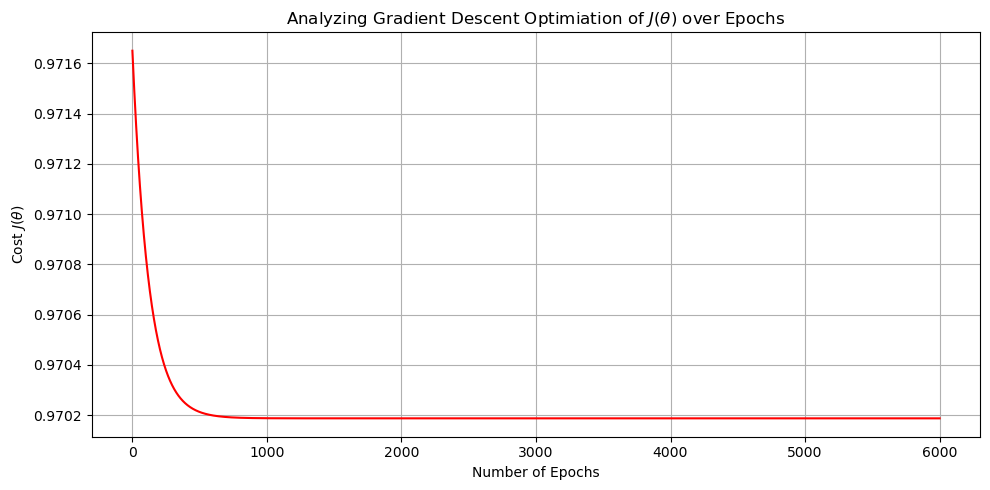

In [21]:
# Code here
# Visualizing cost history plot for Scenario 2

from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 5))
plt.xlabel('Number of Epochs')
plt.ylabel(r'Cost $J(\theta)$')
plt.title(r'Analyzing Gradient Descent Optimiation of $J(\theta)$ over Epochs')
plt.grid()
plt.plot(np.arange(cost_history.size) + 1, cost_history, 'r')
plt.tight_layout()
plt.show()

Provide an interpretation of the graph. Please make sure to address:

1. Does the cost converge to a minimum value?
2. Does the cost values continually decrease or does it "jumping"?

1. **Yes. The cost converges to a minimum value of about 0.9702 with increasing epochs.**
2. **The cost values decrease exponentially till convergence at around 700 epochs.**